In [84]:
from numpy import loadtxt
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
% pylab inline

# load pima-indians-diabetes data, it's a binary classification task
#dataset = loadtxt("data.txt", delimiter=",")
feature = pd.read_csv('encoded_feature.csv') # read train data
train = pd.read_csv('week1.csv')
train.columns = ['SAT','SUN','MON','TUE','WEN','THU','med','mean','max','min','25per','75per']
test = pd.read_csv('week2.csv')
test.columns = ['SAT','SUN','MON','TUE','WEN','THU','med','mean','max','min','25per','75per']
date = pd.read_csv('date.csv')
train_set = pd.concat([feature,train],axis=1)
test_set = pd.concat([feature,test],axis=1)
train_label = date.iloc[:,6]
# test_label = test_feature.iloc[:,-1]

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [85]:
test.head()

,SAT,SUN,MON,TUE,WEN,THU,med,mean,max,min,25per,75per
0,0.431245,0.046564,0.460840,0.040062,0.188110,0.021117,0.117337,0.186468,0.460840,0.021117,0.093282,0.186468
1,0.018746,0.076472,0.375583,0.062110,0.035795,0.203902,0.069291,0.120271,0.375583,0.018746,0.056655,0.120271
2,0.085831,0.016535,0.138067,0.088443,0.100995,0.365496,0.094719,0.127155,0.365496,0.016535,0.075173,0.127155
3,0.212154,0.014422,0.113285,0.111387,0.090639,0.078444,0.101013,0.103049,0.212154,0.014422,0.079365,0.103049
4,0.484287,0.129470,0.151100,0.154270,0.130922,0.081266,0.141011,0.181761,0.484287,0.081266,0.126075,0.181761


In [128]:
# split our data into train & test
X_train, X_test, y_train, y_test = train_test_split(train, train_label,
                                                    random_state = 7, test_size = 0.2)

In [133]:
# eval_metrics can selecy rmse, logloss, error, auc, merror, mlogloss or custom define
eval_set =  [(X_test, y_test)]
model = XGBRegressor(n_estimators=2000, max_depth=3, learning_rate=0.05)
# model = MultiOutputRegressor(model)
model.fit(X_train, y_train,early_stopping_rounds=200, eval_metric="rmse",
          eval_set=eval_set, verbose=True)

[0]	validation_0-rmse:0.453776
Will train until validation_0-rmse hasn't improved in 200 rounds.
[1]	validation_0-rmse:0.440034
[2]	validation_0-rmse:0.427324
[3]	validation_0-rmse:0.415402
[4]	validation_0-rmse:0.404315
[5]	validation_0-rmse:0.394124
[6]	validation_0-rmse:0.384759
[7]	validation_0-rmse:0.375587
[8]	validation_0-rmse:0.367449
[9]	validation_0-rmse:0.359974
[10]	validation_0-rmse:0.352595
[11]	validation_0-rmse:0.346222
[12]	validation_0-rmse:0.340338
[13]	validation_0-rmse:0.334724
[14]	validation_0-rmse:0.329641
[15]	validation_0-rmse:0.324804
[16]	validation_0-rmse:0.320558
[17]	validation_0-rmse:0.316746
[18]	validation_0-rmse:0.313051
[19]	validation_0-rmse:0.309817
[20]	validation_0-rmse:0.306693
[21]	validation_0-rmse:0.303751
[22]	validation_0-rmse:0.301395
[23]	validation_0-rmse:0.298981
[24]	validation_0-rmse:0.296932
[25]	validation_0-rmse:0.295071
[26]	validation_0-rmse:0.293262
[27]	validation_0-rmse:0.291737
[28]	validation_0-rmse:0.289967
[29]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [135]:
y_pred = model.predict(test)

In [136]:
y_pred_final = abs(y_pred)

In [140]:
train_label

0       0.019987
1       0.070896
2       0.127981
3       0.097113
4       0.196790
5       0.061919
6       0.302832
7       0.042066
8       0.078742
9       0.023541
10      0.026622
11      0.017545
12      0.077222
13      0.071619
14      0.003688
15      2.722504
16      0.135574
17      0.072122
18      0.046653
19      0.004632
20      0.005163
21      0.343478
22      0.060212
23      0.106443
24      0.008950
25      0.054418
26      0.039839
27      0.572399
28      0.164215
29      0.060648
          ...   
2598    0.016024
2599    0.234032
2600    0.075591
2601    0.010935
2602    0.025499
2603    0.060861
2604    0.120852
2605    0.006681
2606    0.173273
2607    0.010573
2608    0.043331
2609    0.039698
2610    0.069147
2611    0.066049
2612    0.074767
2613    0.055570
2614    0.066894
2615    0.053250
2616    0.067344
2617    0.047146
2618    1.665220
2619    0.032055
2620    0.164427
2621    1.975059
2622    0.101857
2623    0.268985
2624    0.167467
2625    0.0839

In [141]:
y_pred_final

array([ 0.13792464,  0.1605458 ,  0.19516501, ...,  0.15742004,
        0.09932372,  0.09119505], dtype=float32)

In [137]:
# we can show the feature importances for our features
print(model.feature_importances_)

[ 0.11355599  0.10019647  0.10098232  0.07858546  0.11866405  0.10294695
  0.10294695  0.05461689  0.08015717  0.07269155  0.02554028  0.04911591]


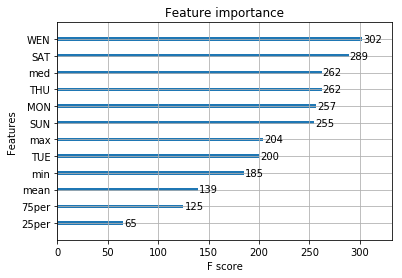

In [138]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model, max_num_features=20)
plt.show()

In [139]:
#predict
submission = pd.read_csv('/data/examples/ibmxfet/testing.csv')
submission['y']=y_pred_final
submission.head()

#匯出
submission.to_csv('submission.csv',index=False)